# Домашнее задание (30 баллов)

## 1. Теория (6 баллов)

 Сеть $G(t)$ образуется присоединением к центральному узлу $t$ треугольников - см. рисунок. ![picture](https://drive.google.com/uc?export=view&id=10oUgXsay2rBYHGIbKoHJVvj95Rl632qz)
 
 Пусть всего в сети $n$ вершин, $n=2t+1$. 

*  (2 балла) Определите средний коэффициент кластеризации вершин в сети $\overline{C}$  как функцию $n$. Чему равен предел при $n \to \infty$? 
* (2 балла) Определите транзитивность  $T$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$? 
* (2 балла) Определите коэффициент ассортативности  $r$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$? **доделать**

**№1**
## $\overline{C(t)}=\frac{C_{центр} + 2t*C_{край}}{2t+1}$

$C_{i}=\frac{2N^{nn}_{i}}{k_{i}(k_{i}-1)}$

$C_{край}=\frac{2*1}{2*1}=1$ 

$C_{центр}=\frac{2t}{2t*(2t-1)}=\frac{1}{2t-1}$ 


$\lim\limits_{t\to \infty} \overline{C(t)}= \frac{1}{4t^2-1}+\frac{2t}{2t+1} \to 0+1 = 1$

**№2**
## $T=\frac{3N_{теуг}}{\frac{1}{2} \sum\limits_{i} k_{i}*(k_{i}-1)}$

$T=\frac{3t}{2t+\frac{1}{2} *2t*(2t-1)}= \frac{3}{2t+1} \to 0$ при $t \to \infty$

**№3**
$cov(x,y) = M(xy) - <k>^2$

x = [2..2,(n-1)..(n-1),2..2]

y = [(n-1)..(n-1),2..2,2..2]

$<k>  = {n+3 \over 3}$

$<k^2> = {n^2 -2n+9 \over 3}$
   
$\sigma^2 = <k^2> - <k>^2 = {n^2 -2n+9 \over 3} - {n^2+6n+9 \over 9} = {2(n-3)^2 \over 9}$

$M(xy)= ({2(n-1) \over 3(n-1)}+ {2(n-1) \over 3(n-1)} + {2*2\over 3(n-1)})(n-1) = {4n \over 3(n-1)}$

$cov(x,y) = {4n \over 3(n-1)} - {(n+3)^2 \over 9} = {12n - (n-1)(n+3)^2 \over 9(n-1)}$

$r= {cov(x,y) \over \sigma^2} = {12n - (n-1)(n+3)^2 \over 9(n-1)}* {9 \over 2(n-3)^2}$

$\lim\limits_{n \to \infty} r = -{1 \over 2}$

## 2. Анализ данных (24 балла)
Выберите данные [здесь](https://networkrepository.com/networks.php) или [здесь](https://snap.stanford.edu/data/). 
Выведите число вершин, число ребер и плотность сети. 




###**Основные структурные свойства, устойчивость сети ( 7 баллов)** 

*  (2 балла)  Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

*  (1 балл) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин;

*  (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности; 

* (2 балла) Исследуйте локальную эффективность максимальной компоненты на устойчивость. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
%matplotlib inline

In [47]:
G=nx.read_edgelist('lastfm_asia_edges_new.csv', delimiter=',') # создаем граф
print('Nodes:',G.number_of_nodes()) # и выводим основные свойства
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G)) # 

Nodes: 7624
Edges: 27806
Density: 0.0009568849118596328


* (2 балла) Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

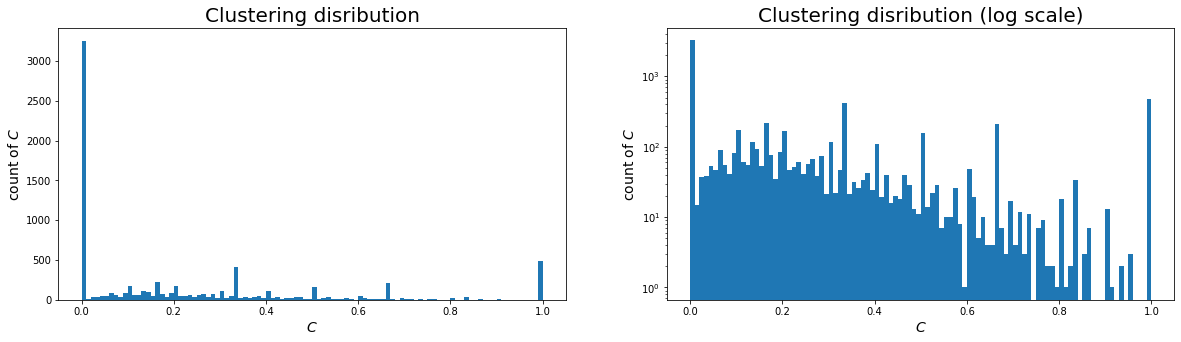

In [67]:
arr_clust_coef = list(nx.clustering(G).values())

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 5))
  
ax[0].hist(arr_clust_coef, bins=100)
ax[0].set_xlabel('$C$', fontsize=14)
ax[0].set_ylabel('count of $C$', fontsize=14)
ax[0].set_title('Clustering disribution', fontsize=20)

ax[1].hist(arr_clust_coef, bins=100, log=True)
ax[1].set_xlabel('$C$', fontsize=14)
ax[1].set_ylabel('count of $C$', fontsize=14)
ax[1].set_title('Clustering disribution (log scale)', fontsize=20)

plt.show()

In [71]:
from collections import Counter
res = Counter(nx.clustering(G).values())
print('Преимущественно коэффициент кластеризации принимает значения (топ 3):\n', res.most_common(3)[0][0],':',res.most_common(3)[0][1],'раз\n',res.most_common(3)[1][0],':',res.most_common(3)[1][1],'раз\n',res.most_common(3)[2][0],':',res.most_common(3)[2][1],'раз')

Преимущественно коэффициент кластеризации принимает значения (топ 3):
 0 : 3249 раз
 1.0 : 483 раз
 0.3333333333333333 : 407 раз


In [72]:
count_null = 0
for coef in arr_clust_coef:
    if coef==0:
        count_null+=1

count_one = 0
for coef_one in arr_clust_coef:
    if coef_one==1.0:
        count_one+=1

print('количество вершин с нулевой кластеризацией: ', count_null)
print('количество вершин с единичной кластеризацией: ', count_one)

количество вершин с нулевой кластеризацией:  3249
количество вершин с единичной кластеризацией:  483


* (1 балла) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин

In [80]:
degrees = [i for b,i in G.degree()]
np.corrcoef(degrees, arr_clust_coef)[0][1]

0.04208647973030705

коэффициент корреляции Пирсона настолько мал, что можно сказать, что корреляции между степенью и коэффициентом кластеризации вершин нет 

* (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности

In [82]:
nx.is_connected(G)

True

поскольку граф связный, то удалим рандомно ребра для проведения исследования

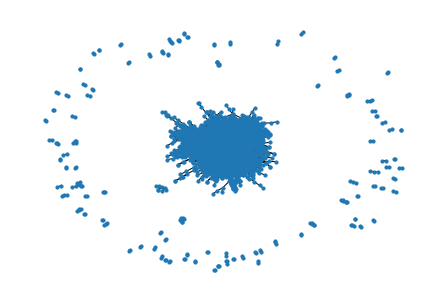

In [96]:
L=list(G.edges())
edge_new = np.random.choice(len(L),int(np.round(0.6*len(L),0)),replace=False)#удалим 40% процентов ребер 
L_new = []
for i in edge_new:
    L_new.append(L[i])
G_new = nx.Graph()
G_new.add_edges_from(L_new)
nx.draw(G_new,node_size=10)

In [101]:
print('было ребер: ', G.number_of_edges())
print('стало: ',G_new.number_of_edges())

было ребер:  27806
стало:  16684


In [98]:
SCC = [len(c) for c in sorted(nx.connected_components(G_new), key=len, reverse=True)]
print('компонент связности: ',len(SCC))

компонент связности:  99


In [99]:
LCG_nodes=max(nx.connected_components(G_new), key=len)#максимальная компонента
LCG=G.subgraph(LCG_nodes)
print('максимальная компонента:',LCG)

максимальная компонента: Graph with 6407 nodes and 26151 edges


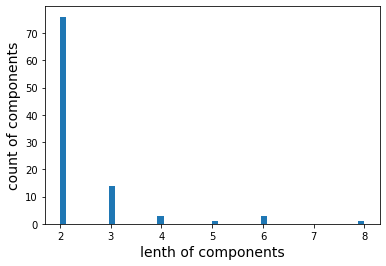

In [100]:
SCC.pop(0)#удалим максимальную компоненту связности
c=plt.hist(SCC,bins=50)
plt.xlabel('lenth of components', fontsize=14)
plt.ylabel('count of components', fontsize=14)
plt.show()

* (2 балла) Исследуйте локальную эффективность максимальной компоненты на устойчивость.

In [121]:
from tqdm import tqdm

epsilon = 0.05
n = int(epsilon*LCG.number_of_edges()) 
H = LCG.copy()
tr = []
tr.append(nx.local_efficiency(H))
for i in tqdm(range(10)):
  edges_removed = np.array(H.edges)[np.random.choice(H.number_of_edges(), n, replace=False)]
  H.remove_edges_from(edges_removed)
  tr.append(nx.local_efficiency(H))

100%|██████████| 10/10 [01:49<00:00, 10.95s/it]


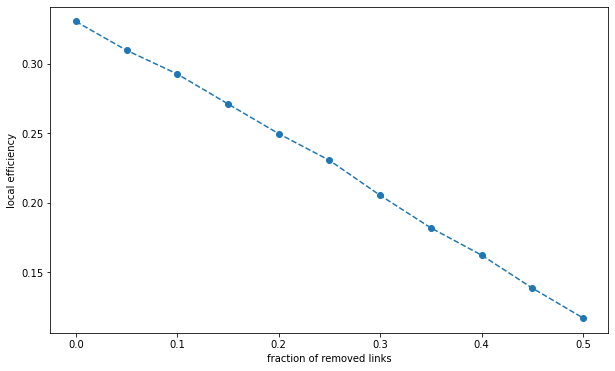

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,10*epsilon, 11),tr,'o--')
plt.xlabel('fraction of removed links')
plt.ylabel('local efficiency')
plt.show()

локальная эффективность уменьшается линейно при удалении ребер


### **Распределение степеней и корреляция ( 9 баллов)**

*  (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения. 

*  (1 балл) Определите коэффициент ассортативности сети. 

*  (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени $k$ определите  среднее значение средней степени ближайших соседей вершин :). 

* (1 балл) Постройте зависимость коэффициента Rich Club от k.

* (2 балла) Напишите функцию разложения сети по core, постройте соответвующее разложение.  

* (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.

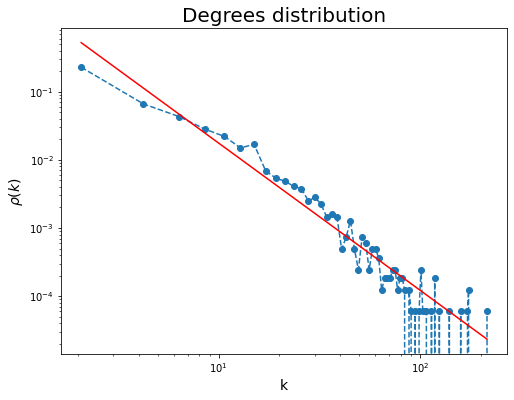

In [117]:
h, x = np.histogram(degrees, bins=100, density=True)
x_ = (x[:-1] + x[1:]) / 2
plt.figure(figsize=(8, 6))
plt.plot(x_, h, 'o--')
z = np.polyfit(np.log(x_[np.nonzero(h)]), np.log(h[np.nonzero(h)]), 1) 
f= np.poly1d(z)
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)
plt.title('Degrees distribution', fontsize=20);

In [119]:
!pip install powerlaw

Calculating best minimal value for power law fit
x_min:  30.0
alpha:  3.238783212968674
sigma:  0.13079111181810288


(-2.983523545962666, 0.12683992385483053)

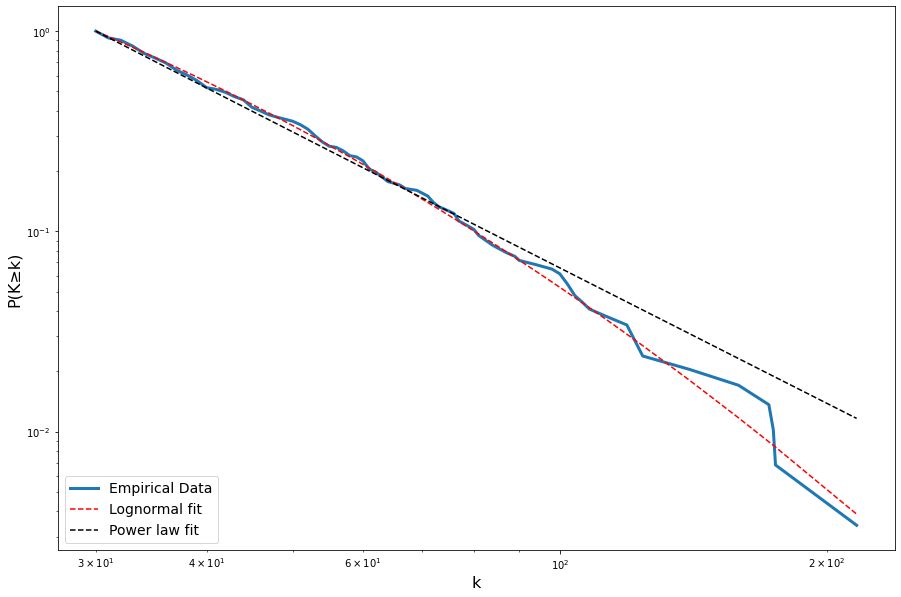

In [120]:
import powerlaw

fig, ax = plt.subplots(figsize = (15,10))
fit = powerlaw.Fit(degrees, discrete=True)
fit.plot_ccdf(ax=ax, linewidth=3, label='Empirical Data')
fit.lognormal.plot_ccdf(ax=ax, color='r', linestyle='--', label='Lognormal fit')
fit.power_law.plot_ccdf(ax=ax, color='k', linestyle='--', label='Power law fit')


ax.set_ylabel(u"P(K≥k)",fontsize=16)
ax.set_xlabel("k",fontsize=16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=3,fontsize=14);
print('x_min: ', fit.xmin)
print('alpha: ', fit.power_law.alpha)
print('sigma: ', fit.power_law.sigma)
fit.distribution_compare('power_law', 'lognormal')

Распределение степеней более близко к логнормальному

* (1 балла) Определите коэффициент ассортативности сети.

In [ ]:
nx.degree_assortativity_coefficient(G)

0.01707317256063152

сеть можно назвать нейтральной


* (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени  𝑘  определите среднее значение средней степени ближайших соседей вершин :)

In [ ]:
arr_tripl = []
for k in G.nodes:
    arr_neig = []
    arr_neig = np.array([i for i in G.neighbors(k)])
    sum_degree = 0
    agr_degree_neig = 0
    for j in arr_neig:
        sum_degree+=G.degree(j)
        agr_degree_neig = sum_degree/len(arr_neig)
    arr_tripl.append((k,G.degree(k),agr_degree_neig))#нода, степень, средняя степень соседей

arr_set_degree = set([G.degree(i) for i in G.nodes()])

arr_final_agr_degree = []
for j in arr_set_degree:
    sum_all=0
    count_node = 0
    for i in range(len(arr_tripl)):
        if arr_tripl[i][1]==j:
            sum_all+=arr_tripl[i][2]
            count_node+=1
    arr_final_agr_degree.append((j,sum_all/count_node))#степень, средняя степеней соседей всех таких нодов

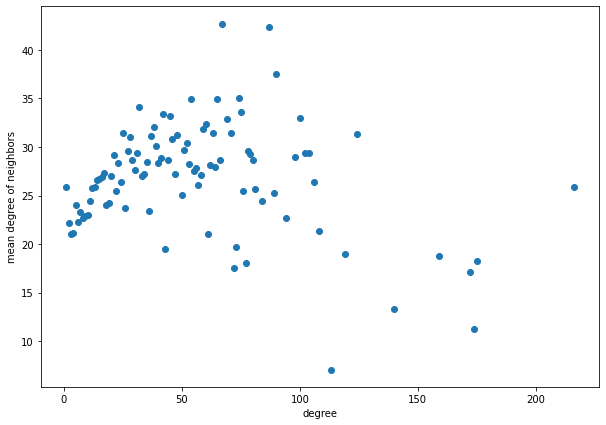

In [ ]:
fig = plt.figure(figsize=(10,7))
x = [arr_final_agr_degree[i][0] for i in range(len(arr_final_agr_degree))]
y = [arr_final_agr_degree[i][1] for i in range(len(arr_final_agr_degree))]
plt.plot(x,y,'o')
plt.xlabel('degree')
plt.ylabel('mean degree of neighbors')
plt.show()

* (1 балла) Постройте зависимость коэффициента Rich Club от k.

In [127]:
dict_rich_club = nx.rich_club_coefficient(G, normalized=False, seed=42)

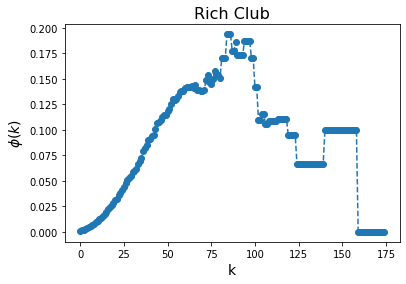

In [162]:
plt.plot([i for i in dict_rich_club.keys()],[i for i in dict_rich_club.values()],'o--')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\phi(k)$', fontsize=14)
plt.title('Rich Club', fontsize=16)
plt.show()

* (2 балла) Напишите функцию разложения сети по core, постройте соответвующее разложение.

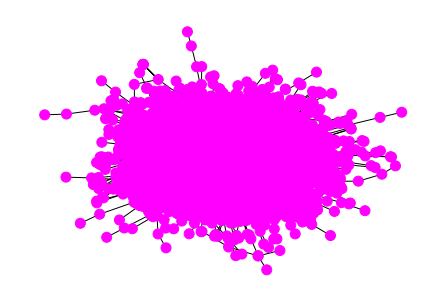

In [ ]:
pos=nx.spring_layout(G,iterations=20)
colors=['#FF00FF']*G.number_of_nodes() # цвет вершин
nx.draw(G,pos,node_size=100,node_color=colors)#,with_labels=True)
limits=plt.axis('off')

In [ ]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


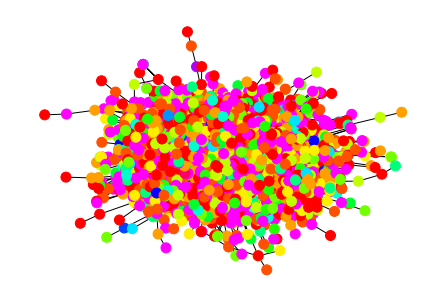

In [ ]:
kg_arr = []
k=1
kG=nx.k_core(G,k)
while len(list(kG))!=0:
    kG=nx.k_core(G,k)
    kG=[int(i) for i in kG]
    kg_arr.append((k,kG))
    k+=1

cmap = get_cmap(len(kg_arr)-1)
for j in range(1,len(kg_arr)-1):
    for node in kg_arr[j][1]:
        colors[node]=cmap(j - 1)

nx.draw(G,pos,node_size=100,node_color=colors)#,with_labels=True)

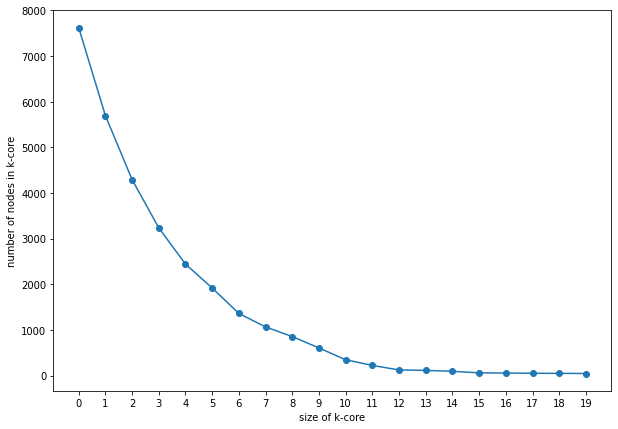

In [ ]:
fig = plt.figure(figsize=(10,7))
x=[i for i in range(len(kg_arr)-1)]
y=[len(kg_arr[i][1]) for i in range(len(kg_arr)-1)]
plt.plot(x,y,'o-')
plt.ylabel('number of nodes in k-core')
plt.xlabel('size of k-core')
plt.xticks(x)
plt.show()

### **Моделирование и рандомизация (8 баллов)**


* (2 балла) Для произвольной (неслучайной) сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает тут или иную характеристику сети. 

* ( 2 балла) Постройте конфигурационную модель для выбранной сети, лучше ли эта модель справляется с описанием свойств? Определите сколько в смоделированной сети петель, мультиребер. 

* (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации. 
Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$. 

* (2 балла) Для произвольной (неслучайной) сети постройте зависимость сетевых характеристик от числа рандомизиции $f$.  

* Для произвольной (неслучайной) сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает тут или иную характеристику сети.

In [141]:
er = nx.erdos_renyi_graph(1000, 0.2, seed=42)
print ('Number of edges =', er.number_of_edges())
print ('Average degree =',np.mean([i for n, i in er.degree()]))
print('Diameter =', nx.diameter(er))
print('Average clustering =', nx.average_clustering(er))
print('Transitivity =', nx.transitivity(er)) 
print('Assortativity =', nx.degree_assortativity_coefficient(er))

Number of edges = 99851
Average degree = 199.702
Diameter = 2
Average clustering = 0.19976782400150875
Transitivity = 0.19976978794381722
Assortativity = 0.0017269192648206228


In [142]:
ba = nx.barabasi_albert_graph(10000, 10)
print ('Number of edges =', ba.number_of_edges())
print ('Average degree =',np.mean([i for n, i in ba.degree()]))
print('Diameter =', nx.diameter(ba))
print('Average clustering =', nx.average_clustering(ba))
print('Transitivity =', nx.transitivity(ba))
print('Assortativity =', nx.degree_assortativity_coefficient(ba))

Number of edges = 99900
Average degree = 19.98
Diameter = 5
Average clustering = 0.010708773394569807
Transitivity = 0.009400705821984155
Assortativity = -0.014881272374609636


* (2 балла) Постройте конфигурационную модель для выбранной сети, лучше ли эта модель справляется с описанием свойств? Определите сколько в смоделированной сети петель, мультиребер.

In [3]:
G_degrees = [i for n,i in G.degree()]

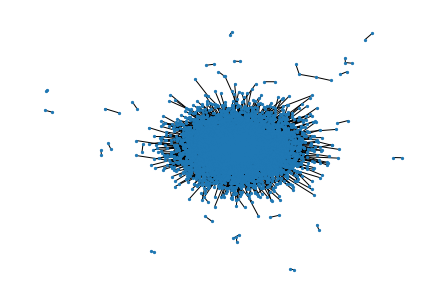

In [6]:
G_konf = nx.configuration_model(G_degrees,seed=100)
nx.draw(G_konf,nx.spring_layout(G_konf,iterations=10),node_size=5)

In [163]:
def num_edges(G):
    A = nx.adjacency_matrix(G)
    A.setdiag(0)
    return int(np.sum(A[A > 1]) / 2)

In [164]:
import warnings
warnings.filterwarnings("ignore")

In [170]:
print('образовалось мультиребер:',num_edges(G_konf))
print('образовалось петель:',nx.number_of_selfloops(G_konf))

образовалось мультиребер: 296
образовалось петель: 7


In [191]:
print('коэффициент ассортативности G_konf =', nx.degree_assortativity_coefficient(G_konf))
print('коэффициент ассортативности G =', nx.degree_assortativity_coefficient(G))

коэффициент ассортативности G_konf = -0.0020264590734019663
коэффициент ассортативности G = 0.01707317256063152


* (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации. 
Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$.

In [174]:
def random_edges(G,f):#Q - кол-во перестановок f - доля
    G_copy = G.copy()
    L = list(G_copy.edges())
    Q = int(np.round(f*len(L),0))
    for m in range(Q):
        t=0
        while t==0:
            i,j = np.random.choice(len(L),2,replace=False)
            (A,B)=L[i]
            (C,D)=L[j]
            if (not G_copy.has_edge(A,D))&(not G_copy.has_edge(C,B))&(A!=D)&(C!=B):
                G_copy.remove_edge(A,B)
                G_copy.remove_edge(C,D)
                G_copy.add_edge(A,D)
                G_copy.add_edge(C,B)
                L[i]=(A,D)
                L[j]=(C,B)
                t+=1
            else:
                t=0

    return G_copy

* (2 балла) Для произвольной (неслучайной) сети постройте зависимость сетевых характеристик от числа рандомизиции $f$.

In [189]:
arr_random_clustering = []
arr_transitivity = []
arr_f = np.linspace(0.1,1.2,10)
for i in arr_f:
    G_new = random_edges(G,i)

    arr_random_clustering.append(nx.average_clustering(G_new))
    arr_transitivity.append(nx.transitivity(G_new))

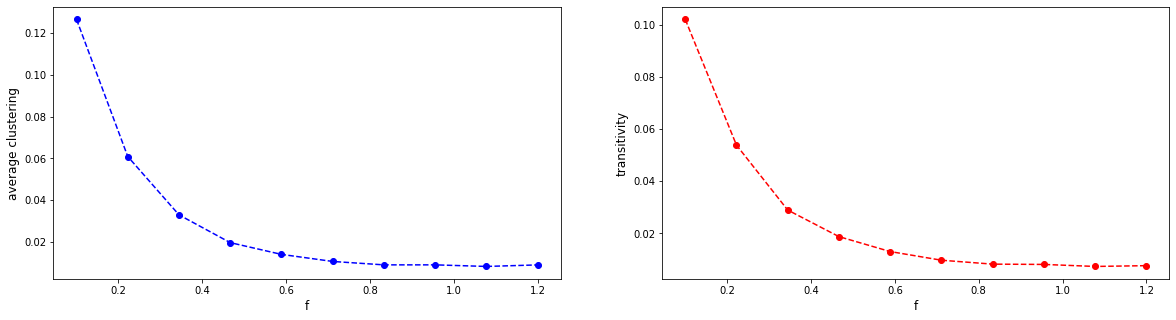

In [190]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 5))
  
ax[0].plot(arr_f,arr_random_clustering,'o--',c='b')
ax[0].set_xlabel('f', fontsize=12)
ax[0].set_ylabel('average clustering', fontsize=12)

ax[1].plot(arr_f,arr_transitivity,'o--',c='r')
ax[1].set_xlabel('f', fontsize=12)
ax[1].set_ylabel('transitivity', fontsize=12)

plt.subplots_adjust(wspace=0.2)

plt.show()

коэффициент кластерризации и транзитивность с увеличением количества перестановок близятся к нулю до $f$=1, а после показатели остаются практически неизменными 